In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()

In [453]:
df = pd.read_excel('football_prediction.xlsx')
df

,home_team,away_team,home_goal,away_goal,home_shoot,away_shoot,home_sot,away_sot,home_posession,away_posession,...,away_foul,home_yellowcard,away_yellowcard,home_redcard,away_redcard,home_offside,away_offside,home_cornerkicks,away_cornerkicks,final_result
0,indonesia,irak,0,2,9,11,1,2,55,45,...,9,1,1,1,0,1,2,8,3,0
1,indonesia,filipina,2,0,20,7,7,1,54,46,...,11,1,3,0,0,7,4,7,4,3
2,arab saudi,indonesia,1,1,18,8,4,2,66,34,...,15,2,3,0,0,4,2,6,1,1
3,indonesia,australia,0,0,5,19,2,5,36,64,...,7,1,3,0,0,0,3,3,15,1
4,bahrain,indonesia,2,2,24,5,5,5,57,43,...,27,2,3,0,0,0,2,7,1,1
5,cina,indonesia,5,14,5,14,3,6,24,76,...,8,1,2,0,0,0,1,1,6,3
6,myanmar,jepang,0,5,3,21,1,9,23,77,...,12,1,1,0,0,0,1,1,9,0
7,jepang,suriah,5,0,21,7,13,0,67,33,...,12,1,2,0,0,1,1,3,1,3
8,jepang,cina,7,0,17,1,9,0,78,22,...,9,0,3,0,0,0,1,5,2,3
9,bahrain,jepang,0,5,3,14,1,9,23,77,...,11,1,0,0,0,3,5,1,4,0


In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   home_team          13 non-null     object
 1   away_team          13 non-null     object
 2   home_goal          13 non-null     int64 
 3   away_goal          13 non-null     int64 
 4   home_shoot         13 non-null     int64 
 5   away_shoot         13 non-null     int64 
 6   home_sot           13 non-null     int64 
 7   away_sot           13 non-null     int64 
 8   home_posession     13 non-null     int64 
 9   away_posession     13 non-null     int64 
 10  home_passing       13 non-null     int64 
 11  away_passing       13 non-null     int64 
 12  homeaccuracy_pass  13 non-null     int64 
 13  away_accuracypass  13 non-null     int64 
 14  home_foul          13 non-null     int64 
 15  away_foul          13 non-null     int64 
 16  home_yellowcard    13 non-null     int64 
 17 

In [455]:
df.describe()

,home_goal,away_goal,home_shoot,away_shoot,home_sot,away_sot,home_posession,away_posession,home_passing,away_passing,...,away_foul,home_yellowcard,away_yellowcard,home_redcard,away_redcard,home_offside,away_offside,home_cornerkicks,away_cornerkicks,final_result
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2.000000,2.538462,12.615385,9.076923,4.076923,3.307692,52.153846,47.846154,449.076923,404.923077,...,11.923077,1.076923,2.307692,0.076923,0.0,1.461538,2.153846,4.769231,4.000000,1.461538
std,2.345208,3.843076,7.182600,6.396113,3.616203,3.224506,19.316859,19.316859,190.168987,155.684222,...,5.040859,0.640513,1.109400,0.277350,0.0,2.106157,1.463224,2.803386,4.163332,1.330124
min,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,23.000000,22.000000,188.000000,215.000000,...,7.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,5.000000,2.000000,1.000000,36.000000,34.000000,277.000000,309.000000,...,9.000000,1.000000,2.000000,0.000000,0.0,0.000000,1.000000,3.000000,1.000000,0.000000
50%,1.000000,1.000000,13.000000,7.000000,3.000000,2.000000,57.000000,43.000000,411.000000,332.000000,...,11.000000,1.000000,3.000000,0.000000,0.0,1.000000,2.000000,5.000000,3.000000,1.000000
75%,3.000000,2.000000,18.000000,14.000000,5.000000,5.000000,66.000000,64.000000,596.000000,457.000000,...,12.000000,1.000000,3.000000,0.000000,0.0,2.000000,3.000000,7.000000,5.000000,3.000000
max,7.000000,14.000000,24.000000,21.000000,13.000000,9.000000,78.000000,77.000000,712.000000,732.000000,...,27.000000,2.000000,4.000000,1.000000,0.0,7.000000,5.000000,9.000000,15.000000,3.000000


In [456]:
#df = df.drop(columns=['home_goal', 'away_goal'])

In [457]:
df_changed = df.copy()

In [458]:
df_changed['home_team'] = df_changed['home_team'].astype('category').cat.codes
df_changed['away_team'] = df_changed['away_team'].astype('category').cat.codes
df_changed

,home_team,away_team,home_goal,away_goal,home_shoot,away_shoot,home_sot,away_sot,home_posession,away_posession,...,away_foul,home_yellowcard,away_yellowcard,home_redcard,away_redcard,home_offside,away_offside,home_cornerkicks,away_cornerkicks,final_result
0,3,4,0,2,9,11,1,2,55,45,...,9,1,1,1,0,1,2,8,3,0
1,3,2,2,0,20,7,7,1,54,46,...,11,1,3,0,0,7,4,7,4,3
2,0,3,1,1,18,8,4,2,66,34,...,15,2,3,0,0,4,2,6,1,1
3,3,0,0,0,5,19,2,5,36,64,...,7,1,3,0,0,0,3,3,15,1
4,1,3,2,2,24,5,5,5,57,43,...,27,2,3,0,0,0,2,7,1,1
5,2,3,5,14,5,14,3,6,24,76,...,8,1,2,0,0,0,1,1,6,3
6,5,5,0,5,3,21,1,9,23,77,...,12,1,1,0,0,0,1,1,9,0
7,4,6,5,0,21,7,13,0,67,33,...,12,1,2,0,0,1,1,3,1,3
8,4,1,7,0,17,1,9,0,78,22,...,9,0,3,0,0,0,1,5,2,3
9,1,5,0,5,3,14,1,9,23,77,...,11,1,0,0,0,3,5,1,4,0


# Calculate the average value of previous matches to be used as a prediction target

In [459]:
# Indonesia home data
indonesia_home_data = df[df['home_team'] == 'indonesia']

average_home_indonesia = indonesia_home_data[['home_shoot', 'home_sot', 'home_posession','home_passing','homeaccuracy_pass','home_foul','home_yellowcard','home_redcard','home_offside','home_cornerkicks']].mean()

average_home_indonesia

home_shoot            11.333333
home_sot               3.333333
home_posession        48.333333
home_passing         350.000000
homeaccuracy_pass     72.666667
home_foul             11.333333
home_yellowcard        1.000000
home_redcard           0.333333
home_offside           2.666667
home_cornerkicks       6.000000
dtype: float64

In [460]:
# Indonesia away data

indonesia_away_data = df[df['away_team'] == 'indonesia']

average_away_indonesia = indonesia_away_data[['away_shoot', 'away_sot', 'away_posession','away_passing','away_accuracypass','away_foul','away_yellowcard','away_redcard','away_offside','away_cornerkicks']].mean()

average_away_indonesia

away_shoot             7.50
away_sot               3.50
away_posession        45.25
away_passing         376.75
away_accuracypass     72.50
away_foul             15.75
away_yellowcard        2.75
away_redcard           0.00
away_offside           1.75
away_cornerkicks       2.25
dtype: float64

In [461]:
# Japan home data

jepang_home_data = df[df['home_team'] == 'jepang']

average_home_jepang = jepang_home_data[['home_shoot', 'home_sot', 'home_posession','home_passing','homeaccuracy_pass','home_foul','home_yellowcard','home_redcard','home_offside','home_cornerkicks']].mean()

average_home_jepang

home_shoot            16.00
home_sot               6.75
home_posession        70.75
home_passing         648.75
homeaccuracy_pass     86.50
home_foul             15.75
home_yellowcard        0.75
home_redcard           0.00
home_offside           0.75
home_cornerkicks       5.25
dtype: float64

In [462]:
# Japan away data

jepang_away_data = df[df['away_team'] == 'jepang']

average_away_jepang = jepang_away_data[['away_shoot', 'away_sot', 'away_posession','away_passing','away_accuracypass','away_foul','away_yellowcard','away_redcard','away_offside','away_cornerkicks']].mean()

average_away_jepang

away_shoot            14.000000
away_sot               7.000000
away_posession        65.666667
away_passing         597.000000
away_accuracypass     87.000000
away_foul             11.666667
away_yellowcard        1.000000
away_redcard           0.000000
away_offside           3.333333
away_cornerkicks       6.000000
dtype: float64

In [463]:
# Combining the results of the average scores of Indonesia as home and Japan as away

indonesia_data = pd.concat([
    
    average_home_indonesia[['home_shoot', 'home_sot', 'home_posession','home_passing','homeaccuracy_pass','home_foul','home_yellowcard','home_redcard','home_offside','home_cornerkicks']],                     
    average_away_jepang[['away_shoot', 'away_sot', 'away_posession','away_passing','away_accuracypass','away_foul','away_yellowcard','away_redcard','away_offside','away_cornerkicks']]

], axis=1)
indonesia_data

,0,1
home_shoot,11.333333,NaN
home_sot,3.333333,NaN
home_posession,48.333333,NaN
home_passing,350.000000,NaN
homeaccuracy_pass,72.666667,NaN
home_foul,11.333333,NaN
home_yellowcard,1.000000,NaN
home_redcard,0.333333,NaN
home_offside,2.666667,NaN
home_cornerkicks,6.000000,NaN


In [464]:
df_t = indonesia_data.T
df_t

,home_shoot,home_sot,home_posession,home_passing,homeaccuracy_pass,home_foul,home_yellowcard,home_redcard,home_offside,home_cornerkicks,away_shoot,away_sot,away_posession,away_passing,away_accuracypass,away_foul,away_yellowcard,away_redcard,away_offside,away_cornerkicks
0,11.333333,3.333333,48.333333,350.0,72.666667,11.333333,1.0,0.333333,2.666667,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,7.0,65.666667,597.0,87.0,11.666667,1.0,0.0,3.333333,6.0


In [465]:
for column in df_t.columns:
    if df_t[column].dtype == 'float64' or df_t[column].dtype == 'int64':  # Pastikan hanya untuk kolom numerik
        mean_value = df_t[column].mean()
        df_t[column] = df_t[column].fillna(mean_value)

In [466]:
df_t = df_t.drop(index=1)
df_t = df_t.astype('int64')

df_team = pd.DataFrame({'home_team':[3], 'away_team':[5]})
df_target = pd.merge(df_team, df_t, how='outer', left_index=True, right_index=True)

df_combined = pd.merge(df_changed,df_target, how='outer')
df_combined

,home_team,away_team,home_goal,away_goal,home_shoot,away_shoot,home_sot,away_sot,home_posession,away_posession,...,away_foul,home_yellowcard,away_yellowcard,home_redcard,away_redcard,home_offside,away_offside,home_cornerkicks,away_cornerkicks,final_result
0,3,4,0.0,2.0,9,11,1,2,55,45,...,9,1,1,1,0,1,2,8,3,0.0
1,3,2,2.0,0.0,20,7,7,1,54,46,...,11,1,3,0,0,7,4,7,4,3.0
2,0,3,1.0,1.0,18,8,4,2,66,34,...,15,2,3,0,0,4,2,6,1,1.0
3,3,0,0.0,0.0,5,19,2,5,36,64,...,7,1,3,0,0,0,3,3,15,1.0
4,1,3,2.0,2.0,24,5,5,5,57,43,...,27,2,3,0,0,0,2,7,1,1.0
5,2,3,5.0,14.0,5,14,3,6,24,76,...,8,1,2,0,0,0,1,1,6,3.0
6,5,5,0.0,5.0,3,21,1,9,23,77,...,12,1,1,0,0,0,1,1,9,0.0
7,4,6,5.0,0.0,21,7,13,0,67,33,...,12,1,2,0,0,1,1,3,1,3.0
8,4,1,7.0,0.0,17,1,9,0,78,22,...,9,0,3,0,0,0,1,5,2,3.0
9,1,5,0.0,5.0,3,14,1,9,23,77,...,11,1,0,0,0,3,5,1,4,0.0


# Data Preprocessing

In [467]:
from sklearn.preprocessing import StandardScaler

x = df_combined.iloc[:12,:-1]
y = df_combined.iloc[:12, -1]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled

,home_team,away_team,home_goal,away_goal,home_shoot,away_shoot,home_sot,away_sot,home_posession,away_posession,...,home_foul,away_foul,home_yellowcard,away_yellowcard,home_redcard,away_redcard,home_offside,away_offside,home_cornerkicks,away_cornerkicks
0,0.311086,0.473804,-0.824061,-0.174741,-0.488108,0.231105,-0.912421,-0.476331,0.244919,-0.244919,...,0.551677,-0.563235,0.000000,-1.147079,3.316625,0.0,-0.198419,-0.113961,1.133445,-0.307535
1,0.311086,-0.559950,0.035829,-0.698963,1.045946,-0.421428,0.772049,-0.793884,0.190492,-0.190492,...,-0.394055,-0.165657,0.000000,0.688247,-0.301511,0.0,2.658814,1.253566,0.775515,-0.061507
2,-1.555428,-0.043073,-0.394116,-0.436852,0.767027,-0.258294,-0.070186,-0.476331,0.843609,-0.843609,...,-1.103355,0.629498,1.732051,0.688247,-0.301511,0.0,1.230197,-0.113961,0.417585,-0.799590
3,0.311086,-1.593703,-0.824061,-0.698963,-1.045946,1.536171,-0.631676,0.476331,-0.789183,0.789183,...,0.315244,-0.960813,0.000000,0.688247,-0.301511,0.0,-0.674624,0.569803,-0.656205,2.644798
4,-0.933257,-0.043073,0.035829,-0.174741,1.603784,-0.747694,0.210559,0.476331,0.353772,-0.353772,...,-0.157622,3.014965,1.732051,0.688247,-0.301511,0.0,-0.674624,-0.113961,0.775515,-0.799590
5,-0.311086,-0.043073,1.325663,2.970594,-1.045946,0.720505,-0.350931,0.793884,-1.442299,1.442299,...,0.078811,-0.762024,0.000000,-0.229416,-0.301511,0.0,-0.674624,-0.797724,-1.372065,0.430548
6,1.555428,0.990680,-0.824061,0.611593,-1.324865,1.862438,-0.912421,1.746545,-1.496726,1.496726,...,-1.576221,0.033131,0.000000,-1.147079,-0.301511,0.0,-0.674624,-0.797724,-1.372065,1.168632
7,0.933257,1.507557,1.325663,-0.698963,1.185406,-0.421428,2.456518,-1.111438,0.898035,-0.898035,...,1.260977,0.033131,0.000000,-0.229416,-0.301511,0.0,-0.198419,-0.797724,-0.656205,-0.799590
8,0.933257,-1.076826,2.185552,-0.698963,0.627568,-1.400227,1.333539,-1.111438,1.496726,-1.496726,...,2.206709,-0.563235,-1.732051,0.688247,-0.301511,0.0,-0.674624,-0.797724,0.059655,-0.553562
9,-0.933257,0.990680,-0.824061,0.611593,-1.324865,0.720505,-0.912421,1.746545,-1.496726,1.496726,...,-0.866921,-0.165657,0.000000,-2.064742,-0.301511,0.0,0.753992,1.937330,-1.372065,-0.061507


# Feature Importance

In [468]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_scaled,y)


ExtraTreesClassifier()

In [469]:
etc.feature_importances_

array([0.02711346, 0.09610083, 0.14031277, 0.05995238, 0.03401786,
       0.0136746 , 0.13252309, 0.03993155, 0.03140972, 0.0269669 ,
       0.01835354, 0.01754996, 0.02526389, 0.0623529 , 0.04107603,
       0.03101488, 0.04257404, 0.05525893, 0.00674242, 0.        ,
       0.02206385, 0.02443687, 0.01441071, 0.03689881])

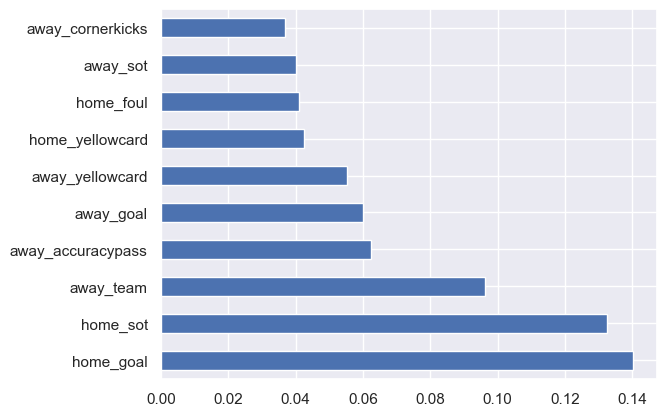

In [470]:
featImportance = pd.Series(etc.feature_importances_, index=x_scaled.columns)
featImportance.nlargest(10).plot(kind='barh')
plt.show()

<Axes: >

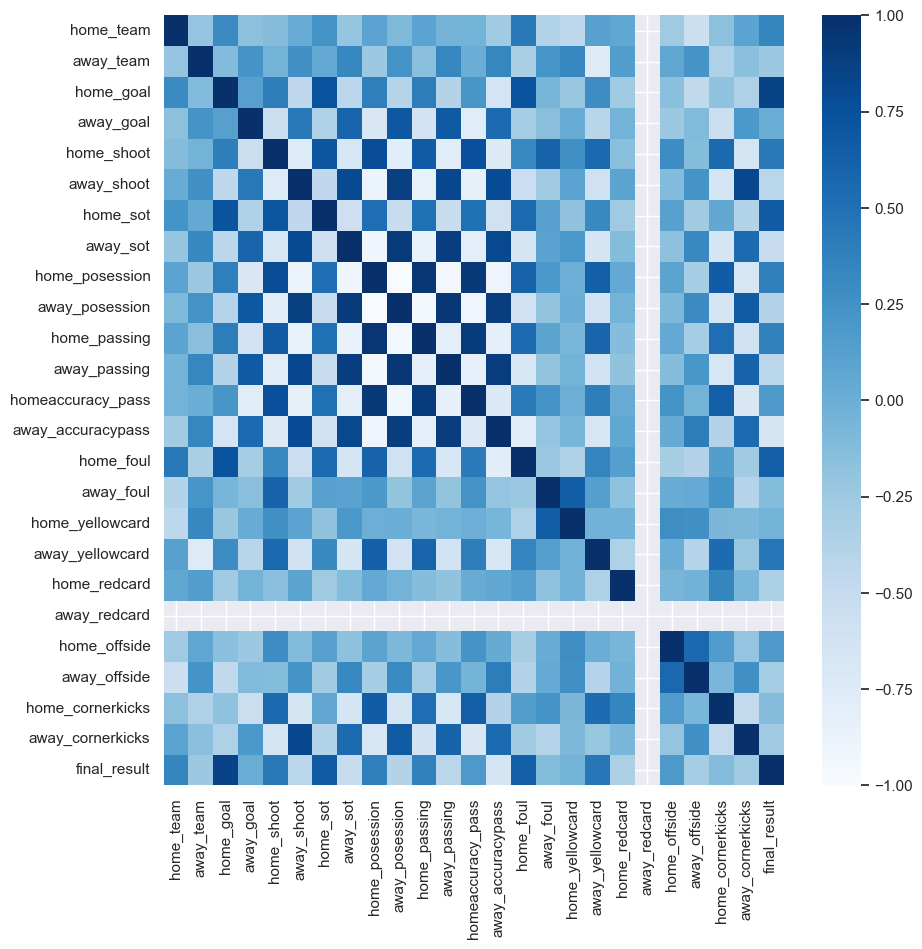

In [471]:
plt.figure(figsize=(10,10))
sns.heatmap(df_changed.corr(), cmap='Blues')

# Data Modeling

## Random Forest Classifier

### Home Score Target

In [472]:
from sklearn.model_selection import train_test_split

x = df_combined.iloc[:13,4:-1]
y = df_combined.iloc[:13,2]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [473]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,criterion='entropy')
model.fit(x_train, y_train)
rf_pred = model.predict(x_test)

In [474]:
rf_pred

array([1., 0., 0., 3.])

In [475]:
rf_result = pd.DataFrame({'Pred':rf_pred, 'Actual':y_test})
rf_result

,Pred,Actual
11,1.0,1.0
9,0.0,0.0
0,0.0,0.0
8,3.0,7.0


### Home Score Prediction

In [476]:
target = df_combined.iloc[13,4:-1].values
target = target.reshape(1,-1)
target

array([[ 11.,  14.,   3.,   7.,  48.,  65., 350., 597.,  72.,  87.,  11.,
         11.,   1.,   1.,   0.,   0.,   2.,   3.,   6.,   6.]])

In [477]:
target = pd.DataFrame(target)
target = target.astype('int64')
target

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,11,14,3,7,48,65,350,597,72,87,11,11,1,1,0,0,2,3,6,6


In [478]:
rf_home_score = model.predict(target)
rf_home_score

C:\Users\chesa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.])

### Away Score Target

In [479]:
from sklearn.model_selection import train_test_split

x = df_combined.iloc[:13,4:-1]
y = df_combined.iloc[:13,3]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [480]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,criterion='entropy')
model.fit(x_train, y_train)
rf_pred = model.predict(x_test)

In [481]:
rf_result = pd.DataFrame({'Pred':rf_pred, 'Actual':y_test})
rf_result

,Pred,Actual
11,0.0,1.0
9,5.0,5.0
0,0.0,2.0
8,0.0,0.0


### Away Score Prediction

In [482]:
target = df_combined.iloc[13,4:-1].values
target = target.reshape(1,-1)
target

array([[ 11.,  14.,   3.,   7.,  48.,  65., 350., 597.,  72.,  87.,  11.,
         11.,   1.,   1.,   0.,   0.,   2.,   3.,   6.,   6.]])

In [483]:
target = pd.DataFrame(target)
target = target.astype('int64')
target

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,11,14,3,7,48,65,350,597,72,87,11,11,1,1,0,0,2,3,6,6


In [484]:
rf_away_score = model.predict(target)
rf_away_score

C:\Users\chesa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.])

### Final Result Prediction

In [485]:
df_combined.iloc[13, 2] = rf_home_score
df_combined.iloc[13,3] = rf_away_score

def set_final_result(row):
    if row['home_goal'] > row['away_goal']:
        return 3  # Home wins -> 3 points
    elif row['home_goal'] < row['away_goal']:
        return 0  # Away wins -> 0 points for home
    else:
        return 1  # Draw -> 1 point for home
        
df_combined['final_result'] = df_combined.apply(set_final_result, axis=1)

df_combined['home_goal'] = df_combined['home_goal'].astype('int64')
df_combined['away_goal'] = df_combined['away_goal'].astype('int64')

df_combined.tail()

,home_team,away_team,home_goal,away_goal,home_shoot,away_shoot,home_sot,away_sot,home_posession,away_posession,...,away_foul,home_yellowcard,away_yellowcard,home_redcard,away_redcard,home_offside,away_offside,home_cornerkicks,away_cornerkicks,final_result
9,1,5,0,5,3,14,1,9,23,77,...,11,1,0,0,0,3,5,1,4,0
10,0,5,0,2,13,7,2,3,57,43,...,12,1,2,0,0,1,4,7,5,0
11,4,0,1,1,12,1,3,0,66,34,...,9,0,4,0,0,0,0,9,0,1
12,4,3,3,1,14,3,2,1,72,28,...,13,2,3,0,0,2,2,4,1,3
13,3,5,0,0,11,14,3,7,48,65,...,11,1,1,0,0,2,3,6,6,1


## Random Forest Evaluation

In [486]:
from sklearn.metrics import accuracy_score

print(f'Accuracy {accuracy_score(y_test, rf_pred)}')

Accuracy 0.5


In [487]:
from sklearn.metrics import classification_report

print(f'{classification_report(rf_pred, y_test)}')

              precision    recall  f1-score   support

         0.0       1.00      0.33      0.50         3
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         5.0       1.00      1.00      1.00         1

    accuracy                           0.50         4
   macro avg       0.50      0.33      0.38         4
weighted avg       1.00      0.50      0.62         4



C:\Users\chesa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chesa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chesa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression

### Home Score Target

In [488]:
from sklearn.model_selection import train_test_split

x = df_combined.iloc[:13,4:-1]
y = df_combined.iloc[:13,2]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [489]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

lr_result = pd.DataFrame({'Prediction':lr_predict, 'Actual':y_test})
lr_result

C:\Users\chesa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Prediction,Actual
11,1,1
9,0,0
0,2,0
8,3,7


### Home Score Prediction

In [490]:
target = df_combined.iloc[13,4:-1].values
target = target.reshape(1,-1)
target

array([[ 11,  14,   3,   7,  48,  65, 350, 597,  72,  87,  11,  11,   1,
          1,   0,   0,   2,   3,   6,   6]], dtype=int64)

In [491]:
target = pd.DataFrame(target)
target = target.astype('int64')
target

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,11,14,3,7,48,65,350,597,72,87,11,11,1,1,0,0,2,3,6,6


In [492]:
lr_home_score = model.predict(target)
lr_home_score

C:\Users\chesa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.])

### Away Score Target

In [493]:
from sklearn.model_selection import train_test_split

x = df_combined.iloc[:13,4:-1]
y = df_combined.iloc[:13,3]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [494]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

lr_result = pd.DataFrame({'Prediction':lr_predict, 'Actual':y_test})
lr_result

C:\Users\chesa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Prediction,Actual
11,1,1
9,14,5
0,0,2
8,1,0


### Away Score Prediction

In [495]:
target = df_combined.iloc[13,4:-1].values
target = target.reshape(1,-1)
target

array([[ 11,  14,   3,   7,  48,  65, 350, 597,  72,  87,  11,  11,   1,
          1,   0,   0,   2,   3,   6,   6]], dtype=int64)

In [496]:
target = pd.DataFrame(target)
target = target.astype('int64')
target

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,11,14,3,7,48,65,350,597,72,87,11,11,1,1,0,0,2,3,6,6


In [497]:
lr_away_score = model.predict(target)
lr_away_score

C:\Users\chesa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.])

## Final Result 

In [498]:
df_combined.iloc[13, 2] = lr_home_score
df_combined.iloc[13,3] = lr_away_score
df_combined.iloc[13,-1] = 1

df_combined['home_goal'] = df_combined['home_goal'].astype('int64')
df_combined['away_goal'] = df_combined['away_goal'].astype('int64')

df_combined.tail()

,home_team,away_team,home_goal,away_goal,home_shoot,away_shoot,home_sot,away_sot,home_posession,away_posession,...,away_foul,home_yellowcard,away_yellowcard,home_redcard,away_redcard,home_offside,away_offside,home_cornerkicks,away_cornerkicks,final_result
9,1,5,0,5,3,14,1,9,23,77,...,11,1,0,0,0,3,5,1,4,0
10,0,5,0,2,13,7,2,3,57,43,...,12,1,2,0,0,1,4,7,5,0
11,4,0,1,1,12,1,3,0,66,34,...,9,0,4,0,0,0,0,9,0,1
12,4,3,3,1,14,3,2,1,72,28,...,13,2,3,0,0,2,2,4,1,3
13,3,5,0,0,11,14,3,7,48,65,...,11,1,1,0,0,2,3,6,6,1


## Data Evaluation

In [499]:
from sklearn.metrics import accuracy_score

print(f'Accuracy {accuracy_score(y_test, lr_predict)}')

Accuracy 0.25


In [500]:
from sklearn.metrics import classification_report

print(f'{classification_report(lr_predict, y_test)}')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.20      0.10      0.13         4
weighted avg       0.50      0.25      0.33         4



C:\Users\chesa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chesa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chesa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chesa\anaconda3\Lib\site-packages\sklearn\metrics\_cla

# Prediction with Neural Network (LSTM)

## Home Prediction Target

In [501]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = x_scaled.reshape((x_scaled.shape[0], 1, x_scaled.shape[1]))

In [502]:
from sklearn.model_selection import train_test_split

x = df_combined.iloc[:13,4:-1]
y = df_combined.iloc[:13,2]

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)

In [503]:
x_train.shape, y_train.shape, x_scaled.shape

((9, 1, 20), (9,), (13, 1, 20))

In [504]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, regularizers

model = keras.Sequential()
model.add(keras.Input(shape=(1,20)))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(16))
model.add(layers.Dropout(0.2))

#Output

model.add(layers.Dense(1))

In [505]:
model.compile(
    loss= keras.losses.MeanSquaredError(), 
    optimizer = keras.optimizers.Adam(learning_rate=0.001), 
    metrics=['mse'])

In [506]:
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 7.5455 - mse: 7.5455 - val_loss: 12.4753 - val_mse: 12.4753
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 7.5347 - mse: 7.5347 - val_loss: 12.4619 - val_mse: 12.4619
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 7.5249 - mse: 7.5249 - val_loss: 12.4471 - val_mse: 12.4471
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 7.5038 - mse: 7.5038 - val_loss: 12.4323 - val_mse: 12.4323
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 7.4915 - mse: 7.4915 - val_loss: 12.4165 - val_mse: 12.4165
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 7.4670 - mse: 7.4670 - val_loss: 12.3997 - val_mse: 12.3997
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 7.4573 - mse: 7.4573 - val_loss: 12.3825 - val_mse: 12.3825
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 7.4434 - mse: 7.4434 - val_loss: 12.3648 - val_mse: 12.3648
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss

In [507]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.7869 - mse: 2.7869


[2.7869417667388916, 2.7869417667388916]

In [508]:
y_test

11    1
9     0
0     0
8     7
Name: home_goal, dtype: int64

In [509]:
nn_prediction = model.predict(x_test)
nn_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


array([[ 1.6236243],
       [-0.0438358],
       [-0.1849281],
       [ 3.7254405]], dtype=float32)

In [510]:
target = df_combined.iloc[13, 4:-1].values
target = target.reshape(1,-1)
target

array([[ 11,  14,   3,   7,  48,  65, 350, 597,  72,  87,  11,  11,   1,
          1,   0,   0,   2,   3,   6,   6]], dtype=int64)

In [511]:
target = pd.DataFrame(target)
target = target.astype('int64')
target

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,11,14,3,7,48,65,350,597,72,87,11,11,1,1,0,0,2,3,6,6


In [512]:
target = np.expand_dims(target, axis=1)
target

array([[[ 11,  14,   3,   7,  48,  65, 350, 597,  72,  87,  11,  11,
           1,   1,   0,   0,   2,   3,   6,   6]]], dtype=int64)

In [513]:
lstm_home_result = model.predict(target)
lstm_home_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


array([[-0.19939168]], dtype=float32)

In [514]:
lstm_home_result = lstm_home_result.astype('int64')

In [525]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_63 (LSTM)                       │ (None, 1, 64)               │          21,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_64 (LSTM)                       │ (None, 1, 32)               │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_65 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,989 (437.46 KB)

 Trainable params: 37,329 (145.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 74,660 (291.64 KB)

## Away Prediction Target

In [515]:
from sklearn.model_selection import train_test_split

x = df_combined.iloc[:13,4:-1]
y = df_combined.iloc[:13,3]

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)

In [516]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = x_scaled.reshape((x_scaled.shape[0], 1, x_scaled.shape[1]))

In [517]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

model = keras.Sequential()
model.add(keras.Input(shape=(1,20)))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(16))
model.add(layers.Dropout(0.2))

#Output

model.add(layers.Dense(1))

In [518]:
model.compile(
    loss= keras.losses.MeanSquaredError(), 
    optimizer = keras.optimizers.Adam(learning_rate=0.001), 
    metrics=['mse']
)

In [519]:
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 25.6516 - mse: 25.6516 - val_loss: 7.4855 - val_mse: 7.4855
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 25.6612 - mse: 25.6612 - val_loss: 7.4689 - val_mse: 7.4689
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 25.6043 - mse: 25.6043 - val_loss: 7.4522 - val_mse: 7.4522
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 25.5952 - mse: 25.5952 - val_loss: 7.4355 - val_mse: 7.4355
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 25.5231 - mse: 25.5231 - val_loss: 7.4184 - val_mse: 7.4184
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 25.4877 - mse: 25.4877 - val_loss: 7.4009 - val_mse: 7.4009
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 25.4805 - mse: 25.4805 - val_loss: 7.3833 - val_mse: 7.3833
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 25.4251 - mse: 25.4251 - val_loss: 7.3651 - val_mse: 7.3651
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss:

In [520]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.1493 - mse: 1.1493


[1.1493223905563354, 1.1493223905563354]

In [526]:
y_test

11    1
9     5
0     2
8     0
Name: away_goal, dtype: int64

In [529]:
nn_prediction = model.predict(x_test)
nn_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0.04612682],
       [4.70125   ],
       [0.10413781],
       [0.06221373]], dtype=float32)

In [521]:
target = df_combined.iloc[13, 4:-1].values
target = target.reshape(1,-1)
target = np.expand_dims(target, axis=1)
target

array([[[ 11,  14,   3,   7,  48,  65, 350, 597,  72,  87,  11,  11,
           1,   1,   0,   0,   2,   3,   6,   6]]], dtype=int64)

In [522]:
lstm_away_result = model.predict(target)
lstm_away_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


array([[2.8734057]], dtype=float32)

In [523]:
lstm_away_result.astype('int64')

array([[2]], dtype=int64)

## Final Result

In [524]:
df_combined.iloc[13, 2] = lstm_home_result
df_combined.iloc[13,3] = lstm_away_result

def set_final_result(row):
    if row['home_goal'] > row['away_goal']:
        return 3  # Home wins -> 3 points
    elif row['home_goal'] < row['away_goal']:
        return 0  # Away wins -> 0 points for home
    else:
        return 1  # Draw -> 1 point for home
        
df_combined['final_result'] = df_combined.apply(set_final_result, axis=1)

df_combined['home_goal'] = df_combined['home_goal'].astype('int64')
df_combined['away_goal'] = df_combined['away_goal'].astype('int64')
df_combined['final_result'] = df_combined['final_result'].astype('int64')

df_combined.tail()

C:\Users\chesa\AppData\Local\Temp\ipykernel_5172\4081810844.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2.8734057]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_combined.iloc[13,3] = lstm_away_result


,home_team,away_team,home_goal,away_goal,home_shoot,away_shoot,home_sot,away_sot,home_posession,away_posession,...,away_foul,home_yellowcard,away_yellowcard,home_redcard,away_redcard,home_offside,away_offside,home_cornerkicks,away_cornerkicks,final_result
9,1,5,0,5,3,14,1,9,23,77,...,11,1,0,0,0,3,5,1,4,0
10,0,5,0,2,13,7,2,3,57,43,...,12,1,2,0,0,1,4,7,5,0
11,4,0,1,1,12,1,3,0,66,34,...,9,0,4,0,0,0,0,9,0,1
12,4,3,3,1,14,3,2,1,72,28,...,13,2,3,0,0,2,2,4,1,3
13,3,5,0,2,11,14,3,7,48,65,...,11,1,1,0,0,2,3,6,6,0
